# Data Sampling

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from research.strings import TARGET, PREDICTORS, DETAILS, INSPECTORS, OTHER_PREDICTORS

In [2]:
df = pd.read_csv("data/train_data.csv")
print("Read {} rows.".format(len(df)))
df.head()

Read 17075 rows.


,criticalFound,Inspection_Date,License,Inspection_ID,Business_ID,Inspector_blue,Inspector_brown,Inspector_green,Inspector_orange,Inspector_purple,...,pastSerious,pastCritical,timeSinceLast,ageAtInspection,consumption_on_premises_incidental_activity,tobacco_retail_over_counter,temperatureMax,heat_burglary,heat_sanitation,heat_garbage
0,0.0,15736,30790,269961.0,30790-20110416,0,0,1,0,0,...,0.0,0.0,2.0,1,0.0,1.0,53.496667,26.992376,37.748787,12.768572
1,0.0,15265,1475890,507211.0,1475890-20110416,1,0,0,0,0,...,0.0,0.0,2.0,1,0.0,0.0,59.046667,13.976557,15.412267,12.895485
2,0.0,15265,1740130,507212.0,1740130-20110216,1,0,0,0,0,...,0.0,0.0,2.0,1,0.0,0.0,59.046667,12.611239,8.320330,8.004220
3,0.0,15266,1447363,507216.0,1447363-20110216,1,0,0,0,0,...,0.0,0.0,2.0,1,0.0,0.0,56.153333,35.906383,38.186618,26.238645
4,0.0,15267,1679459,507219.0,1679459-20100216,1,0,0,0,0,...,0.0,0.0,2.0,1,0.0,0.0,52.730000,9.530785,2.126788,3.401567


In [3]:
from sklearn.model_selection import train_test_split
d_train, d_test = train_test_split(
    df, test_size=(500 / len(df)), stratify=df[TARGET],
    shuffle=True, random_state=0
)
print("Train: N = {0}, P(critical|X) = {1:.5f}".format(len(d_train), d_train[TARGET].mean()))
print("Test:  N = {0}, P(critical|X) = {1:.5f}".format(len(d_test), d_test[TARGET].mean()))

Train: N = 16575, P(critical|X) = 0.14069
Test:  N = 500, P(critical|X) = 0.14000


In [4]:
d_test.head()

,criticalFound,Inspection_Date,License,Inspection_ID,Business_ID,Inspector_blue,Inspector_brown,Inspector_green,Inspector_orange,Inspector_purple,...,pastSerious,pastCritical,timeSinceLast,ageAtInspection,consumption_on_premises_incidental_activity,tobacco_retail_over_counter,temperatureMax,heat_burglary,heat_sanitation,heat_garbage
10781,1.0,15884,1122952,1296447.0,1122952-20121216,0,0,0,1,0,...,0.0,0.0,2.000000,1,0.0,0.0,83.410000,7.000000e+01,6.696511e+01,1.171318e+01
15574,0.0,16045,1169962,1389274.0,1169962-20130816,0,0,0,0,0,...,1.0,0.0,0.852055,1,0.0,0.0,49.180000,3.248791e+01,3.350768e+01,2.226615e+01
10300,1.0,15604,1916161,1285422.0,1916161-20101016,0,0,0,1,0,...,0.0,0.0,0.523288,0,1.0,0.0,68.630000,1.761564e-194,8.725081e-225,3.851730e-212
3155,1.0,15421,1927850,1080212.0,1927850-20111016,0,0,0,1,0,...,0.0,0.0,2.000000,0,0.0,0.0,80.503333,1.384220e+01,1.500097e+01,2.384008e+01
15638,0.0,16148,1384031,1389381.0,1384031-20130516,0,0,0,0,0,...,1.0,0.0,0.517808,1,0.0,0.0,37.736667,2.496919e+01,1.405227e+01,3.449652e+01


In [5]:
d_test.describe()

,criticalFound,Inspection_Date,License,Inspection_ID,Inspector_blue,Inspector_brown,Inspector_green,Inspector_orange,Inspector_purple,Inspector_yellow,pastSerious,pastCritical,timeSinceLast,ageAtInspection,consumption_on_premises_incidental_activity,tobacco_retail_over_counter,temperatureMax,heat_burglary,heat_sanitation,heat_garbage
count,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,5.000000e+02
mean,0.140000,15761.852000,1.253874e+06,1.158715e+06,0.170000,0.126000,0.24600,0.200000,0.058000,0.200000,0.124000,0.064000,1.501430,0.690000,0.128000,0.094000,55.926987,1.990284e+01,2.057077e+01,1.405268e+01
std,0.347335,268.039064,8.633150e+05,2.492441e+05,0.376009,0.332182,0.43111,0.400401,0.233978,0.400401,0.329912,0.244998,0.596897,0.462956,0.334424,0.292121,20.295220,1.615355e+01,1.744579e+01,1.209238e+01
min,0.000000,15219.000000,1.382000e+03,5.093570e+05,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002740,0.000000,0.000000,0.000000,6.013333,2.610916e-246,8.688185e-225,2.694994e-214
25%,0.000000,15547.750000,5.067675e+04,1.114497e+06,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.939726,0.000000,0.000000,0.000000,39.886667,8.500030e+00,6.989109e+00,2.955844e+00
50%,0.000000,15803.500000,1.619250e+06,1.214816e+06,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,55.828333,1.586916e+01,1.627590e+01,1.206825e+01
75%,0.000000,15987.500000,1.992004e+06,1.327745e+06,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,74.230000,2.652382e+01,2.925271e+01,2.211102e+01
max,1.000000,16175.000000,2.279084e+06,1.464219e+06,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,94.843333,7.000000e+01,7.000000e+01,5.000000e+01


In [6]:
df.describe()

,criticalFound,Inspection_Date,License,Inspection_ID,Inspector_blue,Inspector_brown,Inspector_green,Inspector_orange,Inspector_purple,Inspector_yellow,pastSerious,pastCritical,timeSinceLast,ageAtInspection,consumption_on_premises_incidental_activity,tobacco_retail_over_counter,temperatureMax,heat_burglary,heat_sanitation,heat_garbage
count,17075.000000,17075.000000,1.707500e+04,1.707500e+04,17075.000000,17075.000000,17075.000000,17075.000000,17075.000000,17075.000000,17075.00000,17075.000000,17075.000000,17075.000000,17075.000000,17075.000000,17075.000000,1.707500e+04,1.707500e+04,1.707500e+04
mean,0.140673,15745.113324,1.312257e+06,1.143804e+06,0.169663,0.109985,0.269107,0.220732,0.068755,0.161757,0.11104,0.062840,1.513160,0.668404,0.125915,0.090190,55.772423,2.069083e+01,2.129005e+01,1.433046e+01
std,0.347695,273.673180,8.384089e+05,2.624043e+05,0.375348,0.312881,0.443509,0.414752,0.253045,0.368238,0.31419,0.242683,0.595664,0.470800,0.331763,0.286463,19.441299,1.565954e+01,1.734993e+01,1.246926e+01
min,0.000000,15219.000000,1.043000e+03,2.699610e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,6.013333,2.577719e-246,7.447372e-225,7.299644e-238
25%,0.000000,15511.000000,6.852550e+04,1.102228e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.945205,0.000000,0.000000,0.000000,40.593333,9.197918e+00,8.212658e+00,2.926395e+00
50%,0.000000,15782.000000,1.675887e+06,1.215116e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,1.000000,0.000000,0.000000,56.160000,1.752890e+01,1.727557e+01,1.244481e+01
75%,0.000000,15978.000000,2.003804e+06,1.327217e+06,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,2.000000,1.000000,0.000000,0.000000,72.896667,2.848043e+01,2.988554e+01,2.197533e+01
max,1.000000,16176.000000,2.308713e+06,1.493801e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,1.000000,1.000000,1.000000,97.013333,7.000000e+01,7.000000e+01,5.000000e+01


In [7]:
def word_case(val):
    return val[0].upper() + val[1:]

d_sample = pd.DataFrame(d_test[[TARGET] + OTHER_PREDICTORS])
d_sample["inspector_cluster"] = d_test[INSPECTORS].idxmax(axis=1).apply(lambda val: word_case(val.split("_")[1]))
d_sample.head()

,criticalFound,pastSerious,pastCritical,timeSinceLast,ageAtInspection,consumption_on_premises_incidental_activity,tobacco_retail_over_counter,temperatureMax,heat_burglary,heat_sanitation,heat_garbage,inspector_cluster
10781,1.0,0.0,0.0,2.000000,1,0.0,0.0,83.410000,7.000000e+01,6.696511e+01,1.171318e+01,Orange
15574,0.0,1.0,0.0,0.852055,1,0.0,0.0,49.180000,3.248791e+01,3.350768e+01,2.226615e+01,Yellow
10300,1.0,0.0,0.0,0.523288,0,1.0,0.0,68.630000,1.761564e-194,8.725081e-225,3.851730e-212,Orange
3155,1.0,0.0,0.0,2.000000,0,0.0,0.0,80.503333,1.384220e+01,1.500097e+01,2.384008e+01,Orange
15638,0.0,1.0,0.0,0.517808,1,0.0,0.0,37.736667,2.496919e+01,1.405227e+01,3.449652e+01,Yellow


In [8]:
def label_quantile(val, quantiles, labels):
    idx = 0
    for threshold in quantiles:
        if val < threshold:
            break
        idx += 1
    return labels[idx]

In [9]:
def get_quantiles(series, n):
    res = []
    for i in range(1, n):
        percentile = 100 * (i / n)
        threshold = np.percentile(series, q=percentile)
        res.append(threshold)
    return res

In [10]:
fake_data = [0.5, 0.5, 0.5, 0.75, 0.75, 0.75]
labels = ["Low", "Medium", "High"]
quantiles = get_quantiles(fake_data, len(labels))
assert len(quantiles) + 1 == len(labels)
assert label_quantile(0.1, quantiles, labels) is "Low"
assert label_quantile(0.5, quantiles, labels) is "Medium"
assert label_quantile(0.6, quantiles, labels) is "Medium"
assert label_quantile(0.75, quantiles, labels) is "High"
assert label_quantile(1.0, quantiles, labels) is "High"
print("Passes all tests.")

Passes all tests.


In [11]:
cont_feature_labels = {
    "timeSinceLast": ["Very Recent", "Somewhat Recent", "Not Recent"],
    "ageAtInspection": ["Young", "Old"],
    "temperatureMax": ["Low", "Medium", "High"],
    "heat_burglary": ["Low", "Medium", "High"],
    "heat_sanitation": ["Low", "Medium", "High"],
    "heat_garbage": ["Low", "Medium", "High"]
}

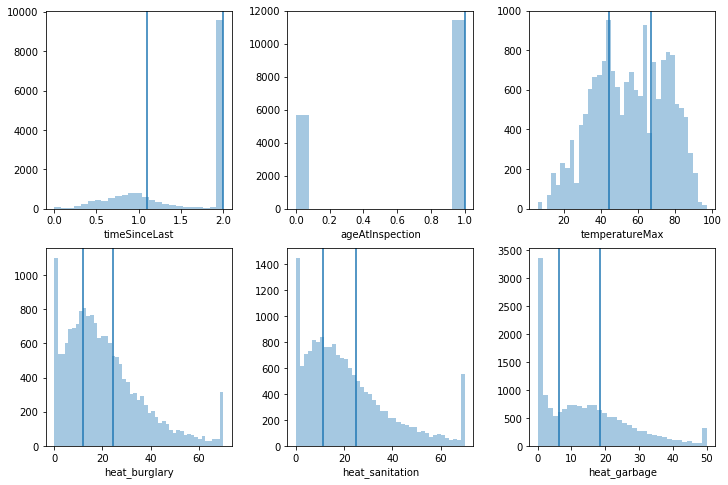

In [12]:
cont_feature_quantiles = {}
M = len(cont_feature_labels)
fig, axes = plt.subplots(2, int(np.ceil(M / 2)))
for feat, ax in zip(cont_feature_labels, list(axes.flatten())):
    percentiles = len(cont_feature_labels[feat])
    quantiles = get_quantiles(df[feat], n=percentiles)
    cont_feature_quantiles[feat] = quantiles
    sns.distplot(df[feat], kde=False, ax=ax)
    for q in quantiles:
        ax.axvline(q)
fig.set_size_inches((12, 8))
plt.subplots_adjust(wspace=0.3)
plt.show()

In [13]:
sdf = pd.DataFrame()
for feat in cont_feature_quantiles:
    quantiles = cont_feature_quantiles[feat]
    labels = cont_feature_labels[feat]
    sdf[feat + "_orig"] = d_sample[feat]
    sdf[feat + "_disc"] = d_sample[feat].apply(lambda val: label_quantile(val, quantiles, labels))
sdf.head()

,timeSinceLast_orig,timeSinceLast_disc,ageAtInspection_orig,ageAtInspection_disc,temperatureMax_orig,temperatureMax_disc,heat_burglary_orig,heat_burglary_disc,heat_sanitation_orig,heat_sanitation_disc,heat_garbage_orig,heat_garbage_disc
10781,2.000000,Not Recent,1,Old,83.410000,High,7.000000e+01,High,6.696511e+01,High,1.171318e+01,Medium
15574,0.852055,Very Recent,1,Old,49.180000,Medium,3.248791e+01,High,3.350768e+01,High,2.226615e+01,High
10300,0.523288,Very Recent,0,Young,68.630000,High,1.761564e-194,Low,8.725081e-225,Low,3.851730e-212,Low
3155,2.000000,Not Recent,0,Young,80.503333,High,1.384220e+01,Medium,1.500097e+01,Medium,2.384008e+01,High
15638,0.517808,Very Recent,1,Old,37.736667,Low,2.496919e+01,High,1.405227e+01,Medium,3.449652e+01,High


In [14]:
disc_feature_labels = {
    "criticalFound": ["False", "True"],
    "pastSerious": ["False", "True"],
    "pastCritical": ["False", "True"],
    "consumption_on_premises_incidental_activity": ["False", "True"],
    "tobacco_retail_over_counter": ["False", "True"],
}
jdf = pd.DataFrame()
for feat in disc_feature_labels:
    labels = disc_feature_labels[feat]
    jdf[feat + "_orig"] = d_sample[feat]
    jdf[feat + "_disc"] = d_sample[feat].apply(lambda val: labels[int(val)])
jdf.head()

,criticalFound_orig,criticalFound_disc,pastSerious_orig,pastSerious_disc,pastCritical_orig,pastCritical_disc,consumption_on_premises_incidental_activity_orig,consumption_on_premises_incidental_activity_disc,tobacco_retail_over_counter_orig,tobacco_retail_over_counter_disc
10781,1.0,True,0.0,False,0.0,False,0.0,False,0.0,False
15574,0.0,False,1.0,True,0.0,False,0.0,False,0.0,False
10300,1.0,True,0.0,False,0.0,False,1.0,True,0.0,False
3155,1.0,True,0.0,False,0.0,False,0.0,False,0.0,False
15638,0.0,False,1.0,True,0.0,False,0.0,False,0.0,False


In [15]:
d_disc = pd.DataFrame()
d_disc["inspector_cluster"] = d_sample["inspector_cluster"]
for feat in disc_feature_labels:
    labels = disc_feature_labels[feat]
    d_disc[feat] = d_sample[feat].apply(lambda val: labels[int(val)])
for feat in cont_feature_quantiles:
    quantiles = cont_feature_quantiles[feat]
    labels = cont_feature_labels[feat]
    d_disc[feat] = d_sample[feat].apply(lambda val: label_quantile(val, quantiles, labels))
d_disc.head()

,inspector_cluster,criticalFound,pastSerious,pastCritical,consumption_on_premises_incidental_activity,tobacco_retail_over_counter,timeSinceLast,ageAtInspection,temperatureMax,heat_burglary,heat_sanitation,heat_garbage
10781,Orange,True,False,False,False,False,Not Recent,Old,High,High,High,Medium
15574,Yellow,False,True,False,False,False,Very Recent,Old,Medium,High,High,High
10300,Orange,True,False,False,True,False,Very Recent,Young,High,Low,Low,Low
3155,Orange,True,False,False,False,False,Not Recent,Young,High,Medium,Medium,High
15638,Yellow,False,True,False,False,False,Very Recent,Old,Low,High,Medium,High


In [16]:
column_renames = {
    "inspector_cluster": "InspectorCluster",
    "criticalFound": "CriticalFound",
    "pastSerious": "PastSerious",
    "pastCritical": "PastCritical",
    "consumption_on_premises_incidental_activity": "ConsumptionLicense",
    "tobacco_retail_over_counter": "TobaccoLicense",
    "timeSinceLast": "TimeSinceLast",
    "ageAtInspection": "AgeAtInspection",
    "temperatureMax": "Temperature",
    "heat_burglary": "Burglaries",
    "heat_sanitation": "SanitationComplaints",
    "heat_garbage": "GarbageCartRequests"
}

In [17]:
renamed = [column_renames[val] for val in list(d_disc.columns)]
out_df = pd.DataFrame(d_disc.copy())
out_df.columns = renamed
out_df.head()

,InspectorCluster,CriticalFound,PastSerious,PastCritical,ConsumptionLicense,TobaccoLicense,TimeSinceLast,AgeAtInspection,Temperature,Burglaries,SanitationComplaints,GarbageCartRequests
10781,Orange,True,False,False,False,False,Not Recent,Old,High,High,High,Medium
15574,Yellow,False,True,False,False,False,Very Recent,Old,Medium,High,High,High
10300,Orange,True,False,False,True,False,Very Recent,Young,High,Low,Low,Low
3155,Orange,True,False,False,False,False,Not Recent,Young,High,Medium,Medium,High
15638,Yellow,False,True,False,False,False,Very Recent,Old,Low,High,Medium,High


In [18]:
outfile = "data/train_500.csv"
out_df.to_csv(outfile, index=False)
print("Wrote {} records and {} features to: {}".format(len(out_df), len(out_df.columns), outfile))

Wrote 500 records and 12 features to: data/train_500.csv
